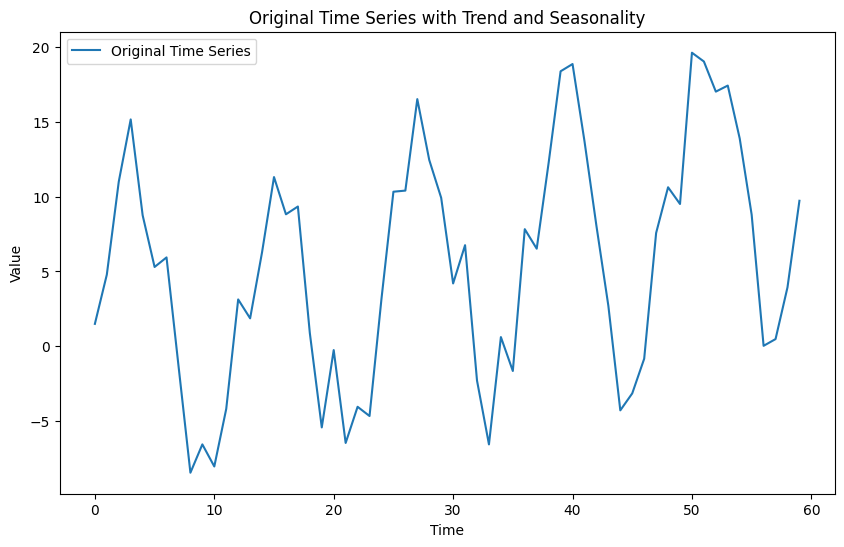

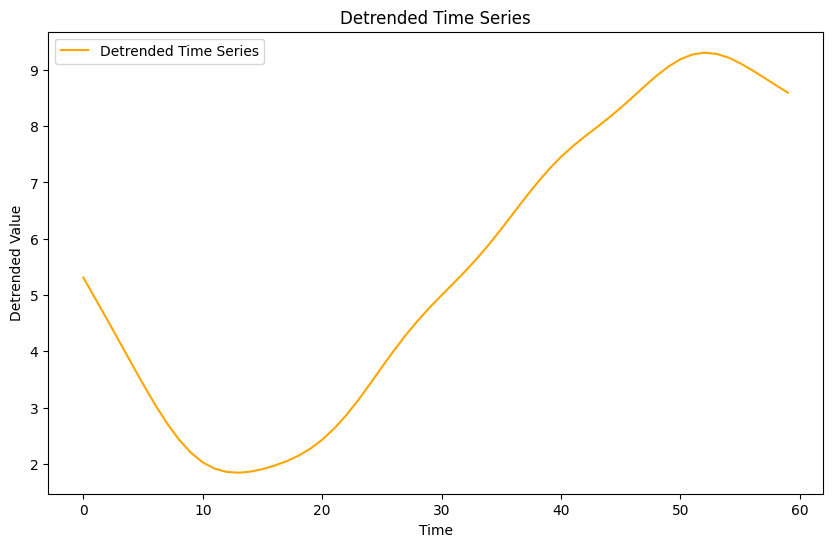

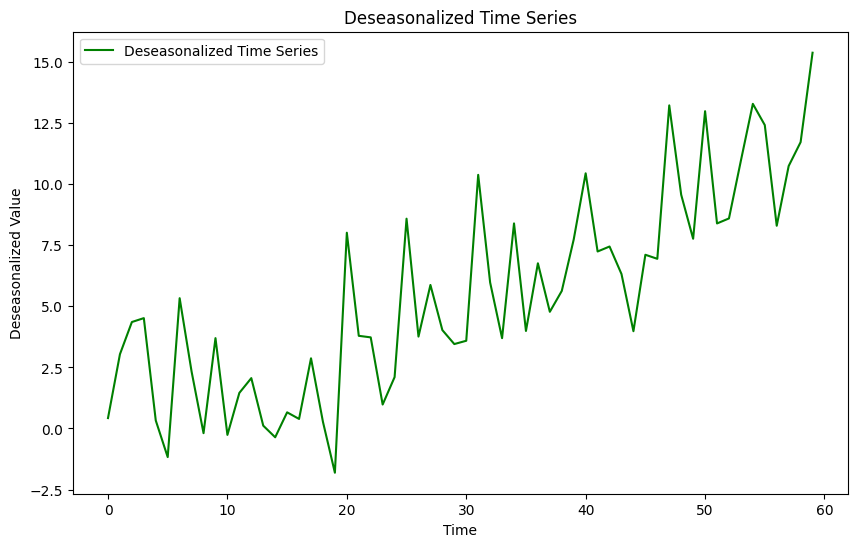

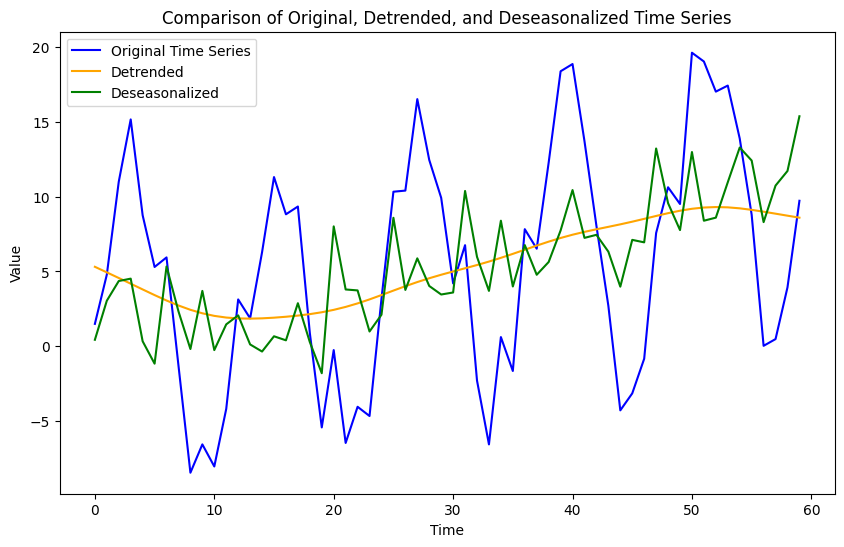

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Step 1: Create synthetic time series data with trend and seasonality
np.random.seed(42)

# Generate a time variable (e.g., monthly data for 5 years)
time = np.arange(0, 60)  # 60 months
seasonal_pattern = 10 * np.sin(2 * np.pi * time / 12)  # seasonal effect (12-month cycle)
trend = 0.2 * time  # linear trend (slow growth over time)
noise = np.random.normal(loc=0, scale=3, size=len(time))  # random noise

# Combine the components to form the time series data
data = seasonal_pattern + trend + noise

# Create a DataFrame to hold the time series
df = pd.DataFrame({'Time': time, 'Value': data})

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Value'], label='Original Time Series')
plt.title('Original Time Series with Trend and Seasonality')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Step 2: Detrending the data using differencing
df['Detrended'] = df['Value'] - sm.tsa.filters.hpfilter(df['Value'], lamb=1600)[0]

# Plot the detrended series
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Detrended'], label='Detrended Time Series', color='orange')
plt.title('Detrended Time Series')
plt.xlabel('Time')
plt.ylabel('Detrended Value')
plt.legend()
plt.show()

# Step 3: Deseasonalizing the data
# Perform seasonal decomposition to remove seasonal component
result = sm.tsa.seasonal_decompose(df['Value'], model='additive', period=12)  # 12-month seasonality

# Extract deseasonalized data
df['Deseasonalized'] = df['Value'] - result.seasonal

# Plot the deseasonalized series
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Deseasonalized'], label='Deseasonalized Time Series', color='green')
plt.title('Deseasonalized Time Series')
plt.xlabel('Time')
plt.ylabel('Deseasonalized Value')
plt.legend()
plt.show()

# Step 4: Plot all together for comparison
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Value'], label='Original Time Series', color='blue')
plt.plot(df['Time'], df['Detrended'], label='Detrended', color='orange')
plt.plot(df['Time'], df['Deseasonalized'], label='Deseasonalized', color='green')
plt.title('Comparison of Original, Detrended, and Deseasonalized Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
